# Biased Random Walk
En este notebook se implementa la Biased Random Walk y se estudia el fenómeno de cutoff de esta cadena. 

In [31]:
# config
import numpy as np
np.set_printoptions(precision=10)

import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : False, #True a false
          "font.family" : "DejaVu Serif", # serif a DejaVu Serif
          "font.serif" : ["Computer Modern Serif"],
         "font.size" : 22}
plt.rcParams.update(params)
import matplotlib.animation as animation

In [32]:
### Simulación de una cadena de Markov ###
def trans(x, u, P):
    """
    Recibe un estado x, una v.a. uniforme u y una matriz de transición P.
    Retorna el siguiente estado de la cadena.
    """
    suma = 0
    y = 0
    while True:
        suma += P[x, y]
        if suma >= u: break
        y+=1
    return y

def CM(N, x_0, P):
    """
    Retorna N pasos de una cadena con matriz de transición P y estado inicial x_0
    """
    U = np.random.rand(N)
    cadena = np.zeros(N, dtype="int")
    cadena[0] = x_0
    for i in range(1, N):
        cadena[i] = trans(cadena[i-1], U[i], P)
    return cadena

In [33]:
### Modelación del problema
def transMat(n, beta):
    """
    Matriz de transición para el paseo aleatorio sesgado en {0,...,n} con sesgo 0<beta<1/3.
    """
    P = np.zeros((n+1, n+1))
    # Casos borde
    P[0, 1] = 1/3 - beta
    P[0, 0] = 2/3 + beta
    P[n, n-1] = 1/3 + beta
    P[n, n] = 2/3 - beta
    for i in range(1, n):
        P[i, i+1] = 1/3 - beta
        P[i, i] = 1/3
        P[i, i-1] = 1/3 + beta
    return P

def distInv(n, beta):
    """
    Distribución invariante de la cadena, depende solo de beta
    """
    pi = np.zeros(n+1)
    pi[0] = 2*beta/(1/3+beta)
    for i in range(1, n+1):
        pi[i] = pi[0]*((1/3-beta)/(1/3+beta))**i
    return pi

## Resultados

In [34]:
### Parámetros del problema
n, N = 100, 5*10**3
beta = 0.03
P = transMat(n, beta)
x_0 = n

cadena_ejemplo = CM(N, x_0, P)

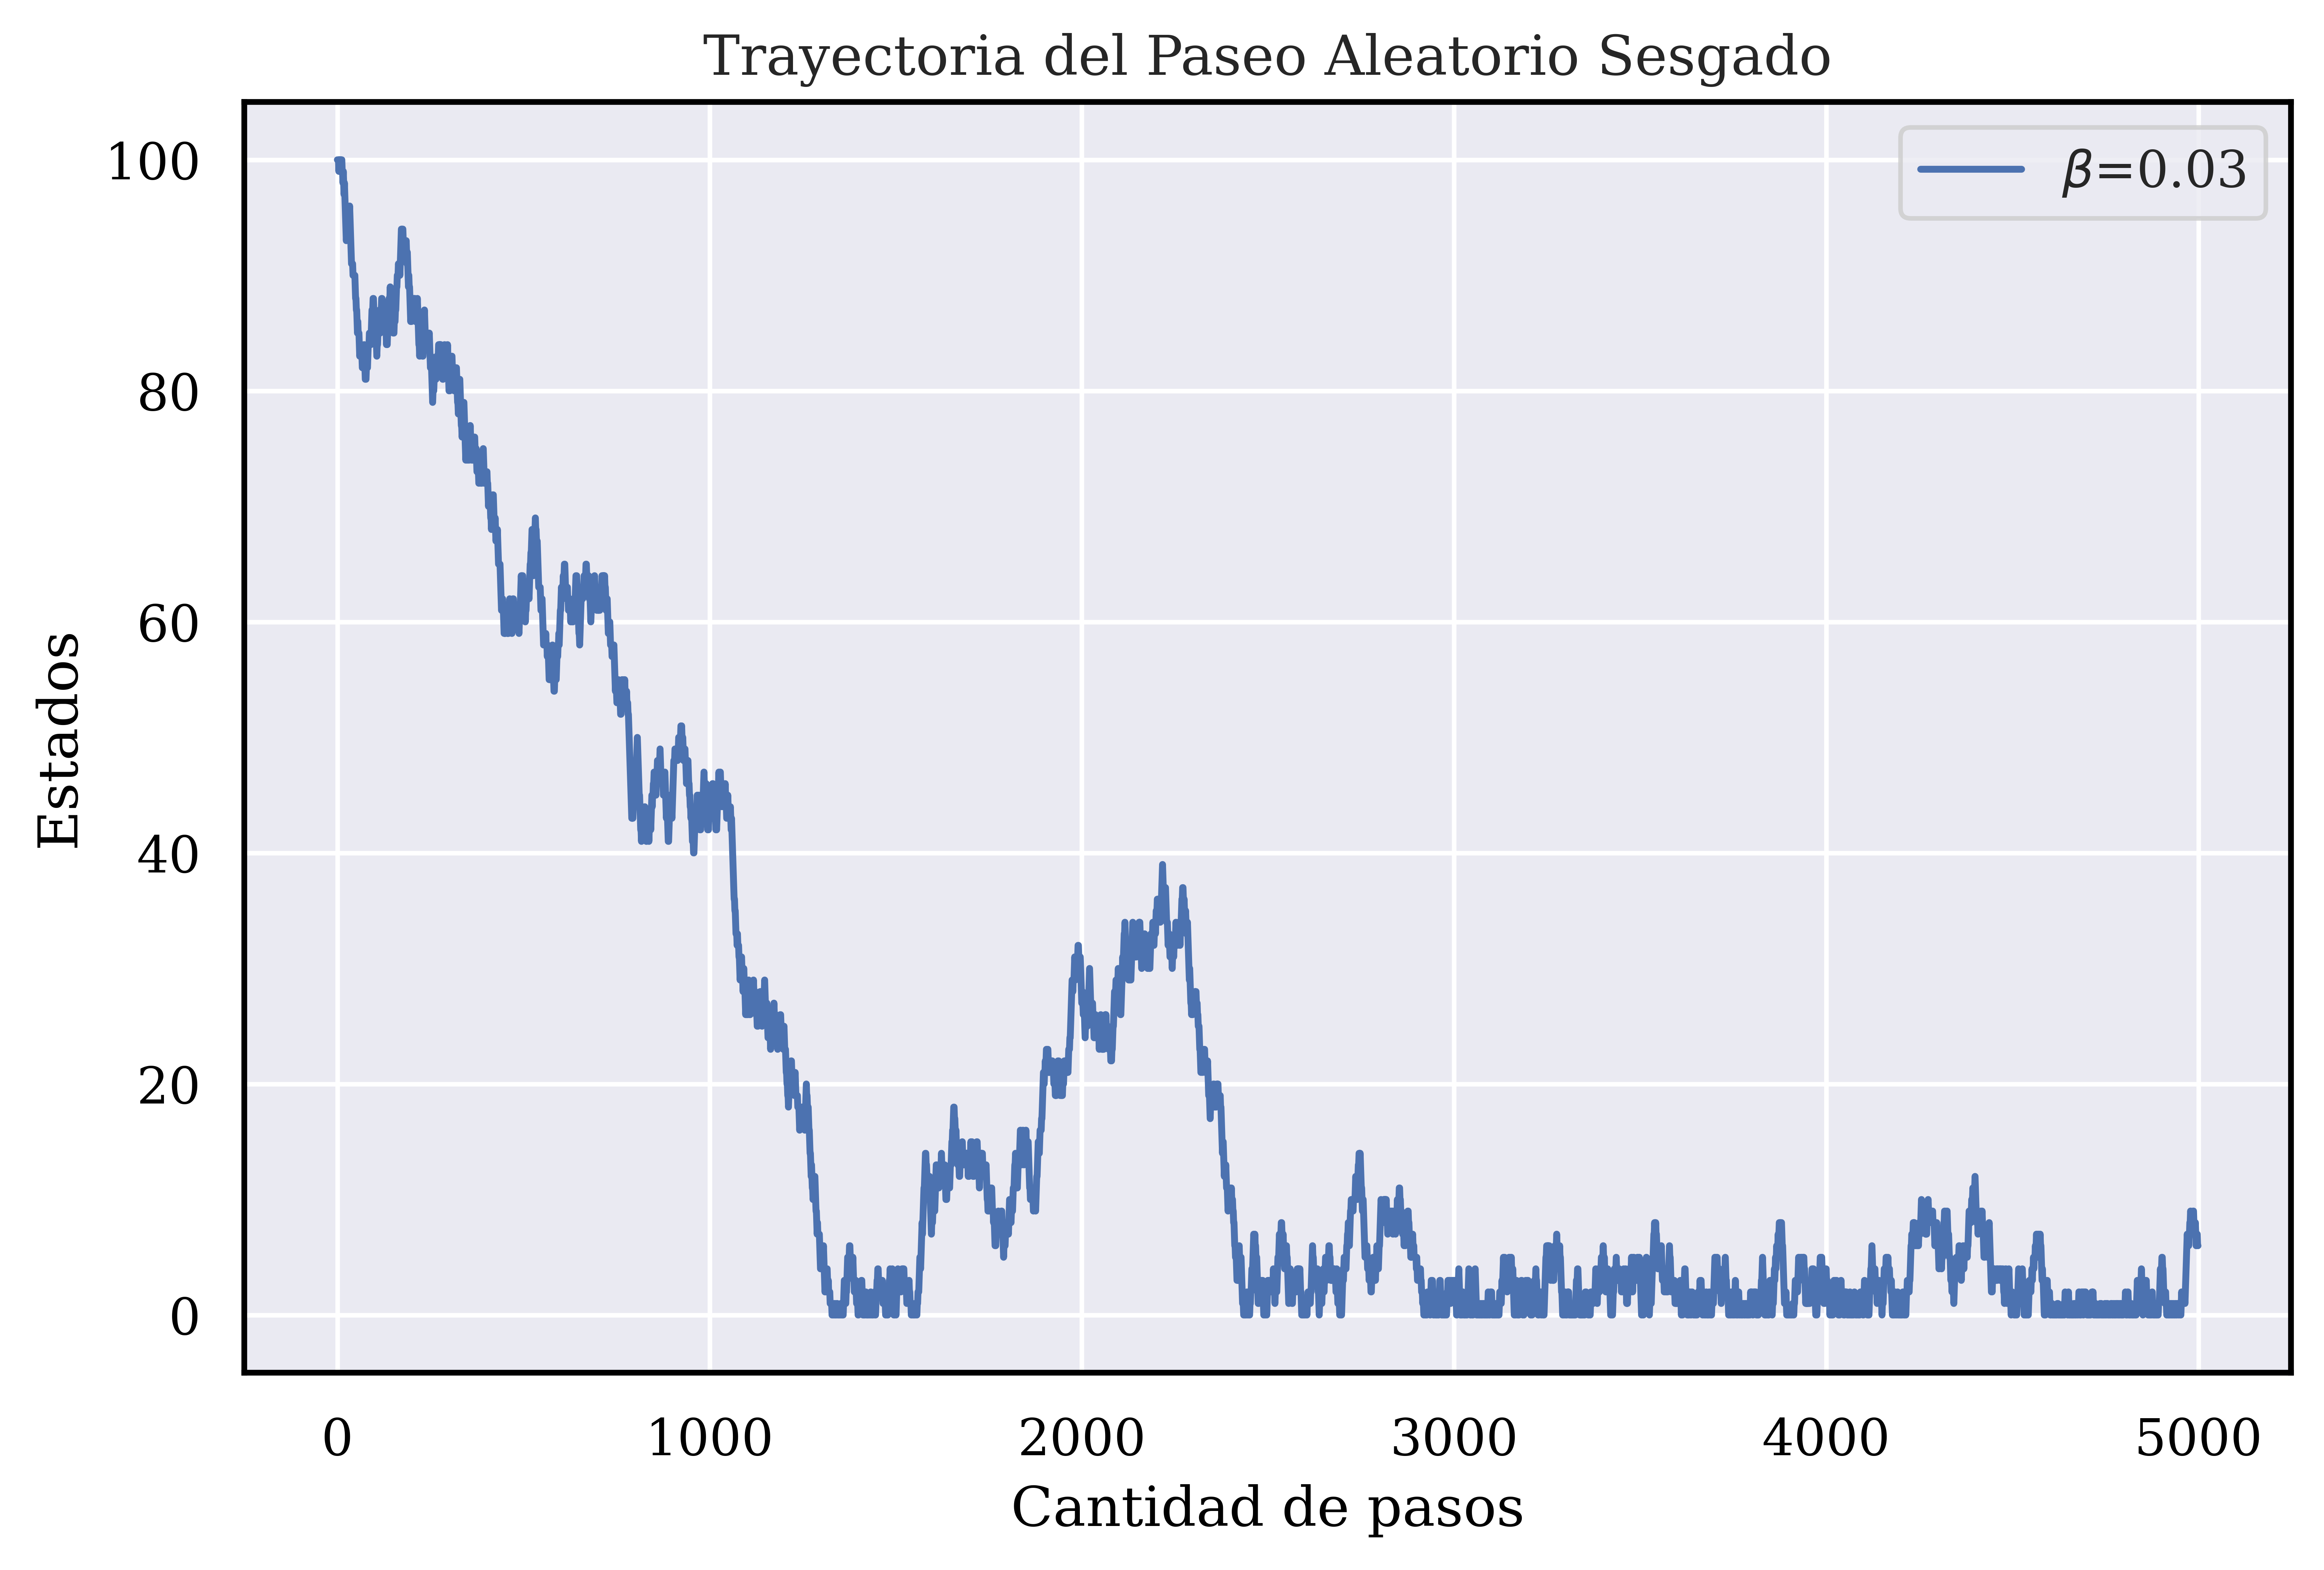

In [35]:
plt.figure(figsize=(8,5), dpi=900)
plt.title("Trayectoria del Paseo Aleatorio Sesgado")
plt.xlabel("Cantidad de pasos")
plt.ylabel("Estados")
plt.plot(cadena_ejemplo, label=rf"$\beta$={beta}")

plt.legend()
plt.show()

In [37]:
### Estimación de la variación total
def TV(n, N, x_0, P, r, beta):
    """
    Retorna estimaciones de la distribución de la cadena en cada tiempo k en {0,..., N}.
    x_0 es el estado inicial y P la matriz de transición.
    r es la cantidad de réplicas para la estimación
    """
    P = transMat(n, beta)
    nu = distInv(n, beta)
    variaciones = np.zeros(N)
    cadenas = []
    for _ in range(r):
        cadenas.append(CM(N, x_0, P))
    cadenas = np.array(cadenas)
    for j in range(N):
        mu = np.bincount(cadenas[:,j], minlength=n+1)/r
        variaciones[j] = 0.5*sum(np.abs(mu-nu))
    return variaciones

In [38]:
# Ejemplo
r = 1000
var_ejemplo = TV(n, N, x_0, P, r, beta)

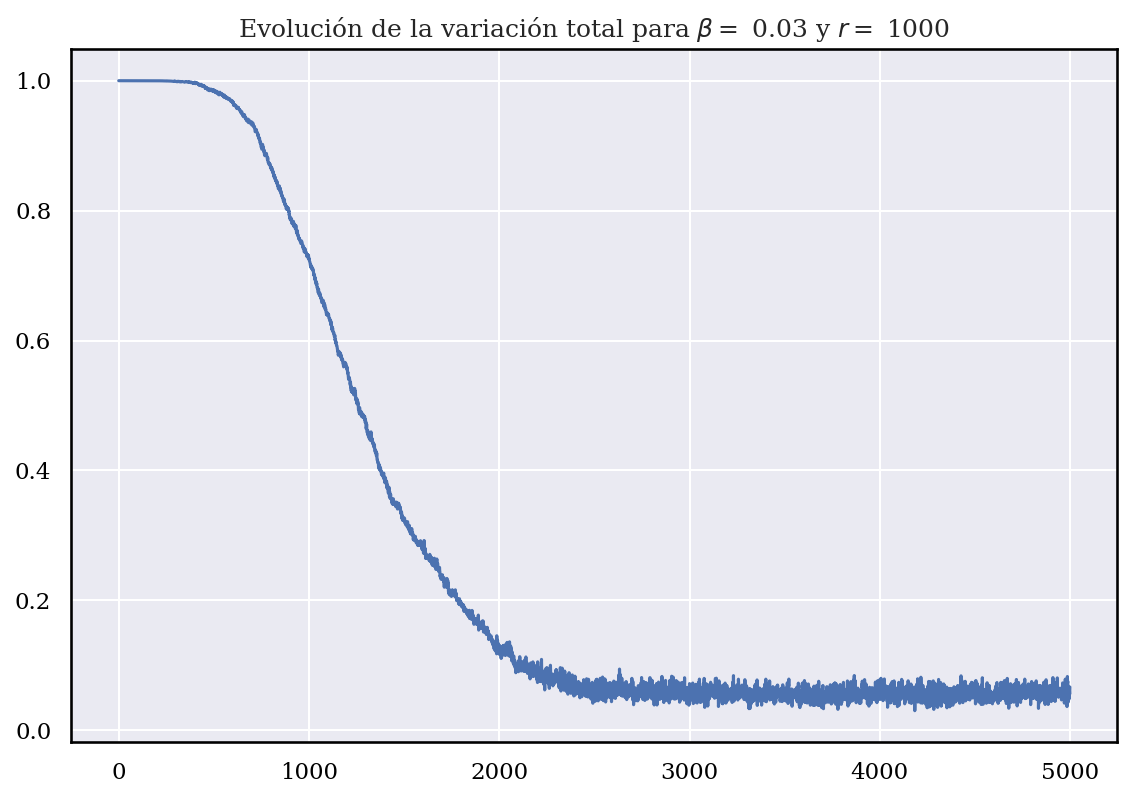

In [39]:
# Ejemplo
plt.figure(figsize=(9,6), dpi=150)
plt.title(rf"Evolución de la variación total para $\beta=$ {beta} y $r=$ {r}")
plt.plot(var_ejemplo)

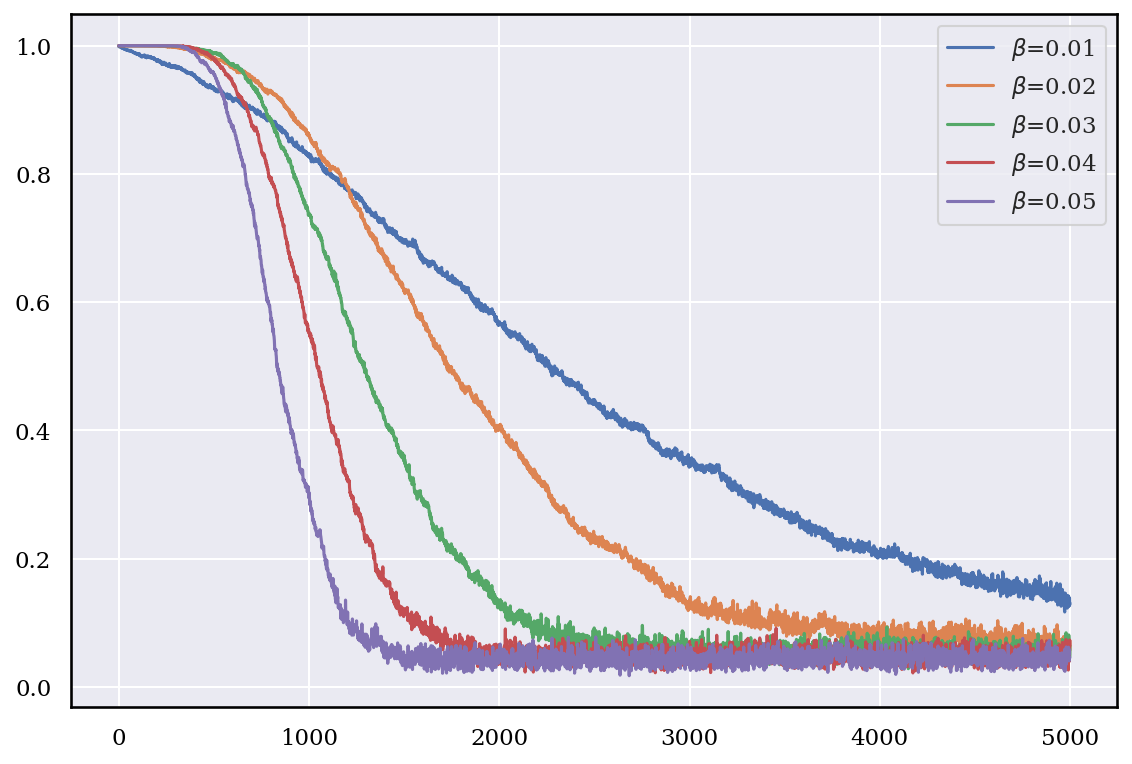

In [41]:
# Dependencia de beta
plt.figure(figsize=(9,6), dpi=150)
for beta in [0.01, 0.02, 0.03, 0.04, 0.05]:
    plt.plot(TV(n, N, x_0, P, 1000, beta), label=rf'$\beta$={beta}')
plt.legend()